In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns

In [5]:
import mysql.connector

In [6]:
db = mysql.connector.connect( host = "localhost",username = "root", password = "Rohan@2003",database = "ecommerce")

In [7]:
cur = db.cursor()

# List all unique cities where customers are located.

In [7]:
query = " " " Select distinct customer_city from customers " " "

In [8]:
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [10]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
data

[(90202,)]

# Find the total sales per category.


In [13]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales 
from products join order_items on products.product_id =  order_items.product_id join payments
on payments.order_id = order_items.order_id group by category """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["Category" , "Sales"])
df                  

,Category,Sales
0,PERFUMERY,4053909.28
1,FURNITURE DECORATION,11441411.13
2,TELEPHONY,3895056.41
3,BED TABLE BATH,13700429.37
4,AUTOMOTIVE,6818354.65
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


# Calculate the percentage of orders that were paid in installments.

In [14]:
query = """ select (sum(case when payment_installments > 1 then 1 else 0 end))/count(*)*100 from payments """
cur.execute(query)

data = cur.fetchall()
data

[(Decimal('49.4176'),)]

#  Count the number of customers from each state. 

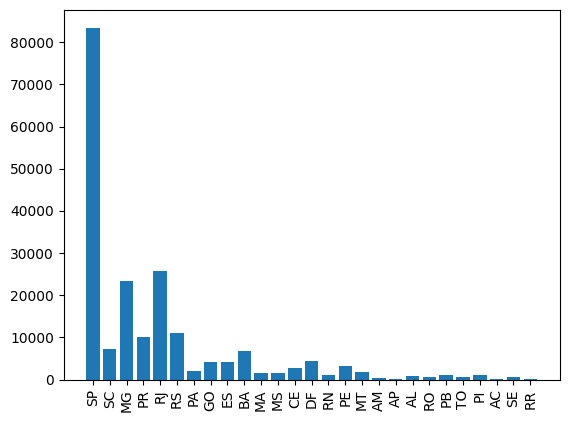

In [17]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state """ 

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state" , "customer_count"])

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90 )
plt.show()


#  Calculate the number of orders per month in 2018.

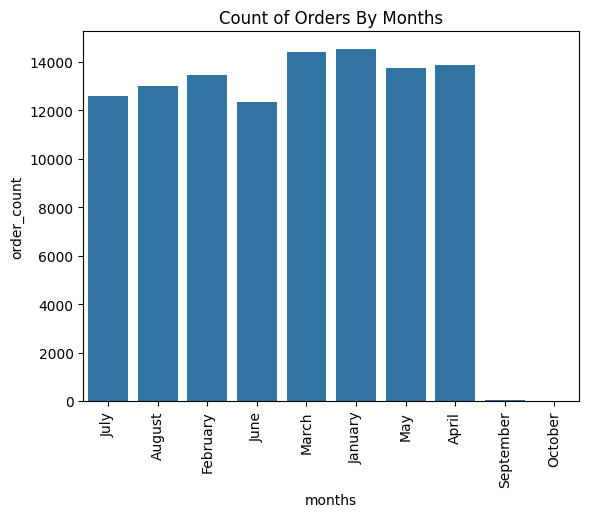

In [24]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) from orders where 
year(order_purchase_timestamp) = 2018 
group by months """
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months" , "order_count"])
sns.barplot(x = df["months"],y = df["order_count"], data = df)
plt.xticks(rotation = 90)
plt.title("Count of Orders By Months")

plt.show()

# Find the average number of products per order, grouped by customer city.

In [28]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city","average orders"])
df.head(10)

,customer city,average orders
0,sao paulo,4.62
1,sao jose dos campos,4.55
2,porto alegre,4.70
3,indaial,4.46
4,treze tilias,5.09
5,rio de janeiro,4.59
6,mario campos,5.33
7,guariba,4.00
8,cuiaba,4.79
9,franca,5.01


# Calculate the percentage of total revenue contributed by each product category.

In [29]:
query = """ select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales 
from products join order_items on products.product_id =  order_items.product_id join payments
on payments.order_id = order_items.order_id group by category order by sales desc """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category" , "percentage distribution"])
df.head()


,Category,percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


#  Identify the correlation between product price and the number of times a product has been purchased.

In [34]:
import numpy as np
query = """select products.product_category , 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category" , "order_count" , "price"])
arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157557


# Calculate the total revenue generated by each seller, and rank them by revenue.

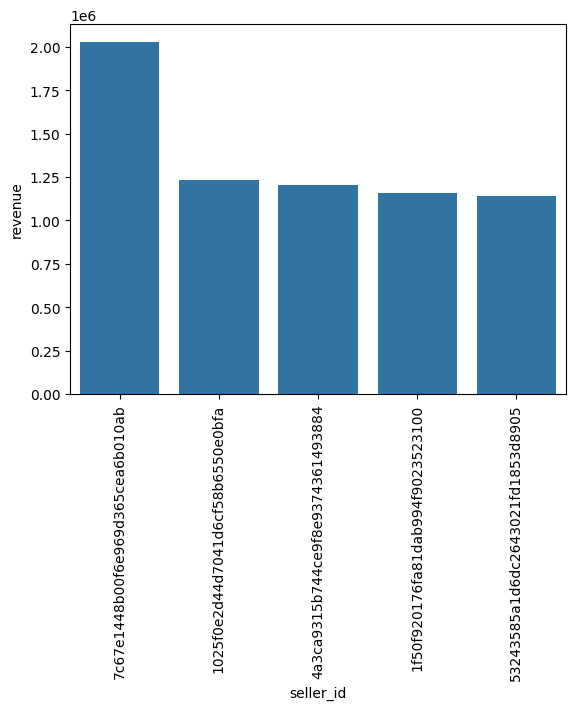

In [41]:
query = """ select *,dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments 
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id" , y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [9]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer_id","order_time","payment","moving_average"])
df

,customer_id,order_time,payment,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


#  Calculate the cumulative sales per month for each year.

In [10]:
query = """ select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# Calculate the year-over-year growth rate of total sales.

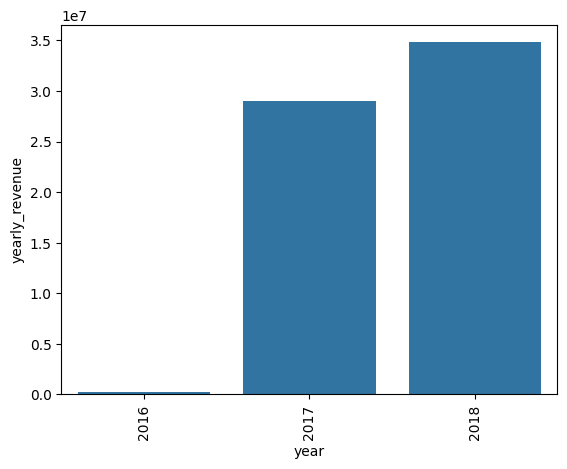

In [10]:
query = """ select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["year","yearly_revenue"])
sns.barplot(x = "year" , y = "yearly_revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Identify the top 3 customers who spent the most money in each year.

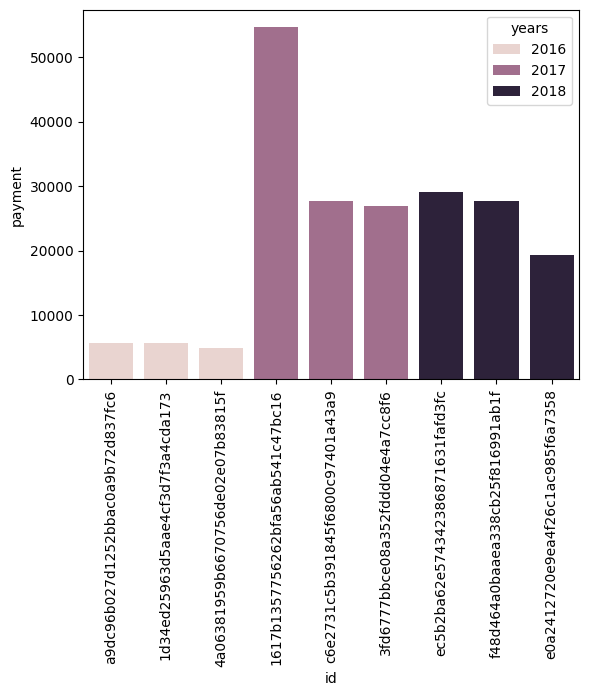

In [8]:
query = """select years, customer_id, payment, d_rank
from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a 
where d_rank <=3 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()